## Black Friday Dataset

### Importing the Libraries

In [1]:
# Import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
### Importing the Train Dataset
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Exploratory Data Analysis and Feature Engineering

In [3]:
###Getting the Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
### Describing the Dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Handling The Missing Values

In [5]:
### Finding the Null Values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [7]:
### Droping the User Id
df.drop(['User_ID'], axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
### Droping the Product_ID
df.drop(['Product_ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
## Replacing Missing values
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [10]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [11]:
df['Product_Category_2'].mode()[0]

8.0

In [12]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [13]:
df['Product_Category_2'].isnull().sum()

0

In [14]:
## Replacing Missing values Product Category 3 
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [15]:
df['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [16]:
df['Product_Category_3'].mode()[0]

16.0

In [17]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [18]:
df['Product_Category_3'].isnull().sum()

0

In [19]:
## Replacing Missing values Product Category 3 
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [20]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [21]:
df['Purchase'].mode()[0]

7011

In [22]:
## Replace the missing values with mode
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mode()[0])

In [23]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Handling The Categorical Values

In [24]:
#Handling Categorical feature
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,1,55+,16,C,4+,0,8,8.0,16.0,7969


In [25]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [26]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [27]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,8.0,16.0,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,8.0,16.0,1422
3,0,1,10,A,2,0,12,14.0,16.0,1057
4,1,7,16,C,4+,0,8,8.0,16.0,7969


In [28]:
##Handling categorical City_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [29]:

df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [30]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,C,4+,0,8,8.0,16.0,7969,0,1


In [31]:
## Drop city category feature
df.drop('City_Category',axis=1,inplace=True)

In [32]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4+,0,8,8.0,16.0,7969,0,1


In [33]:
#Handling Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  object 
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  uint8  
 10  C                           550068 non-null  uint8  
dtypes: float64(2), int64(6), object(1), uint8(2)
memory usage: 38.8+ MB


### Converting the Object Into Integer Type

In [36]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int64  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  uint8  
 10  C                           550068 non-null  uint8  
dtypes: float64(2), int64(7), uint8(2)
memory usage: 38.8 MB


In [37]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int64  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  int64  
 10  C                           550068 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 46.2 MB


In [39]:
df['Product_Category_2']=df['Product_Category_2'].astype(int)
df['Product_Category_3']=df['Product_Category_3'].astype(int)
df['Purchase']=df['Purchase'].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   Stay_In_Current_City_Years  550068 non-null  int64
 4   Marital_Status              550068 non-null  int64
 5   Product_Category_1          550068 non-null  int64
 6   Product_Category_2          550068 non-null  int64
 7   Product_Category_3          550068 non-null  int64
 8   Purchase                    550068 non-null  int64
 9   B                           550068 non-null  int64
 10  C                           550068 non-null  int64
dtypes: int64(11)
memory usage: 46.2 MB


## Visualizing The Dataset

<AxesSubplot: xlabel='Age', ylabel='Purchase'>

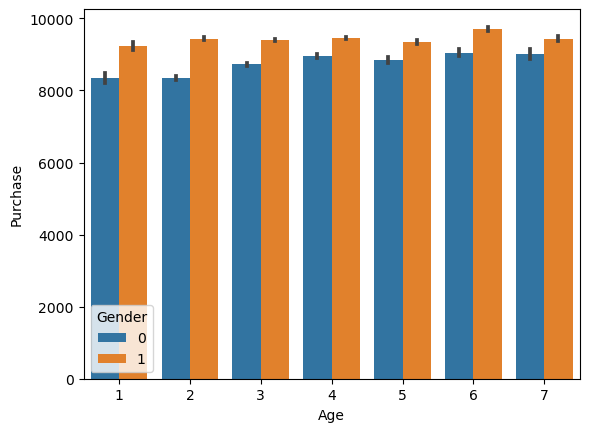

In [41]:
##Visualisation Age vs Purchase
sns.barplot(data=df, x="Age", y="Purchase", hue="Gender")

#### Observation
Purchasing of man is Higher than woman

<AxesSubplot: xlabel='Occupation', ylabel='Purchase'>

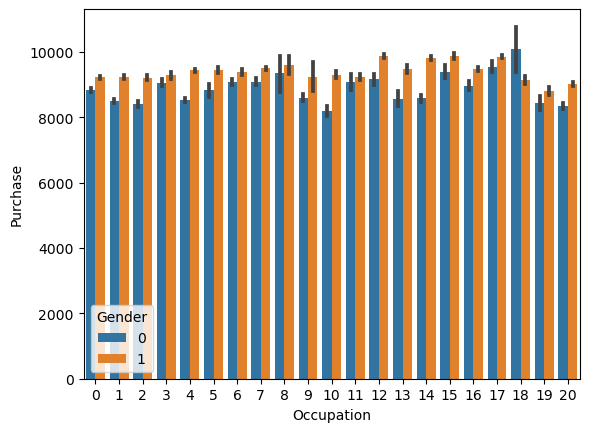

In [42]:
##Visualisation of purchase with occupation
sns.barplot(data=df, x="Occupation", y="Purchase", hue="Gender")

<AxesSubplot: xlabel='Product_Category_1', ylabel='Purchase'>

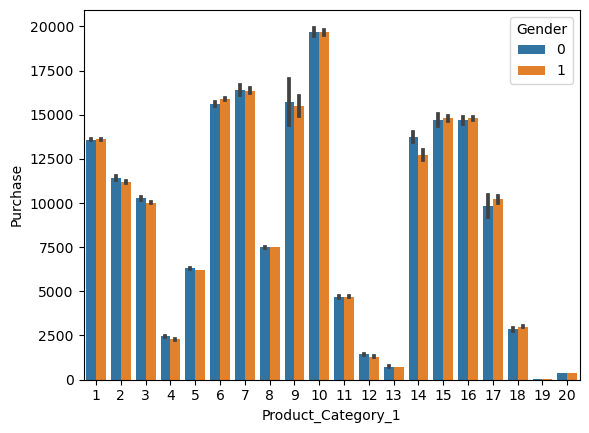

In [43]:
##Visualisation of purchase with  Product_Category_1 
sns.barplot(data=df, x="Product_Category_1", y="Purchase", hue="Gender")

<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

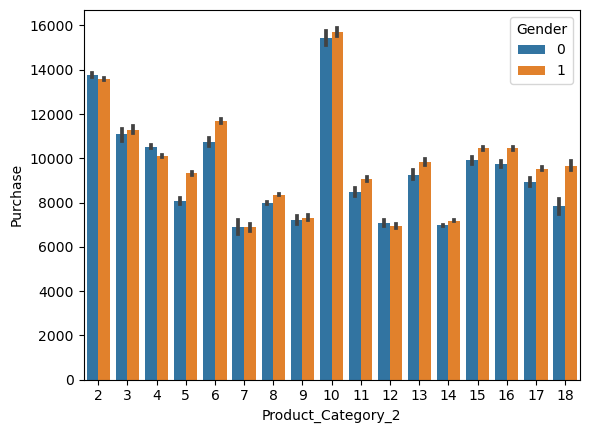

In [44]:
##Visualisation of purchase with  Product_Category_2 
sns.barplot(data=df, x="Product_Category_2", y="Purchase", hue="Gender")

<AxesSubplot: xlabel='Product_Category_3', ylabel='Purchase'>

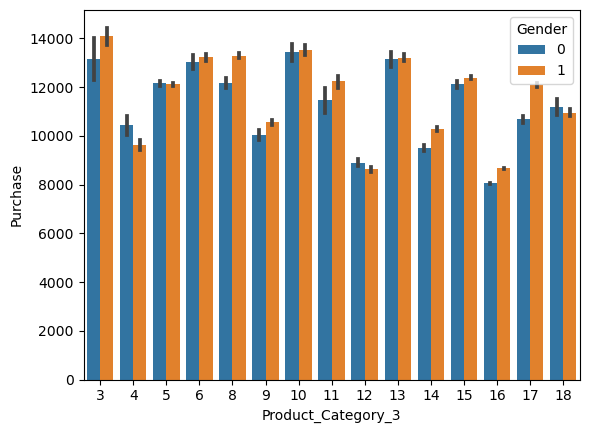

In [45]:
##Visualisation of purchase with  Product_Category_3 
sns.barplot(data=df, x="Product_Category_3", y="Purchase", hue="Gender")

#### Observation
Product_Category_1 has been purchased the most

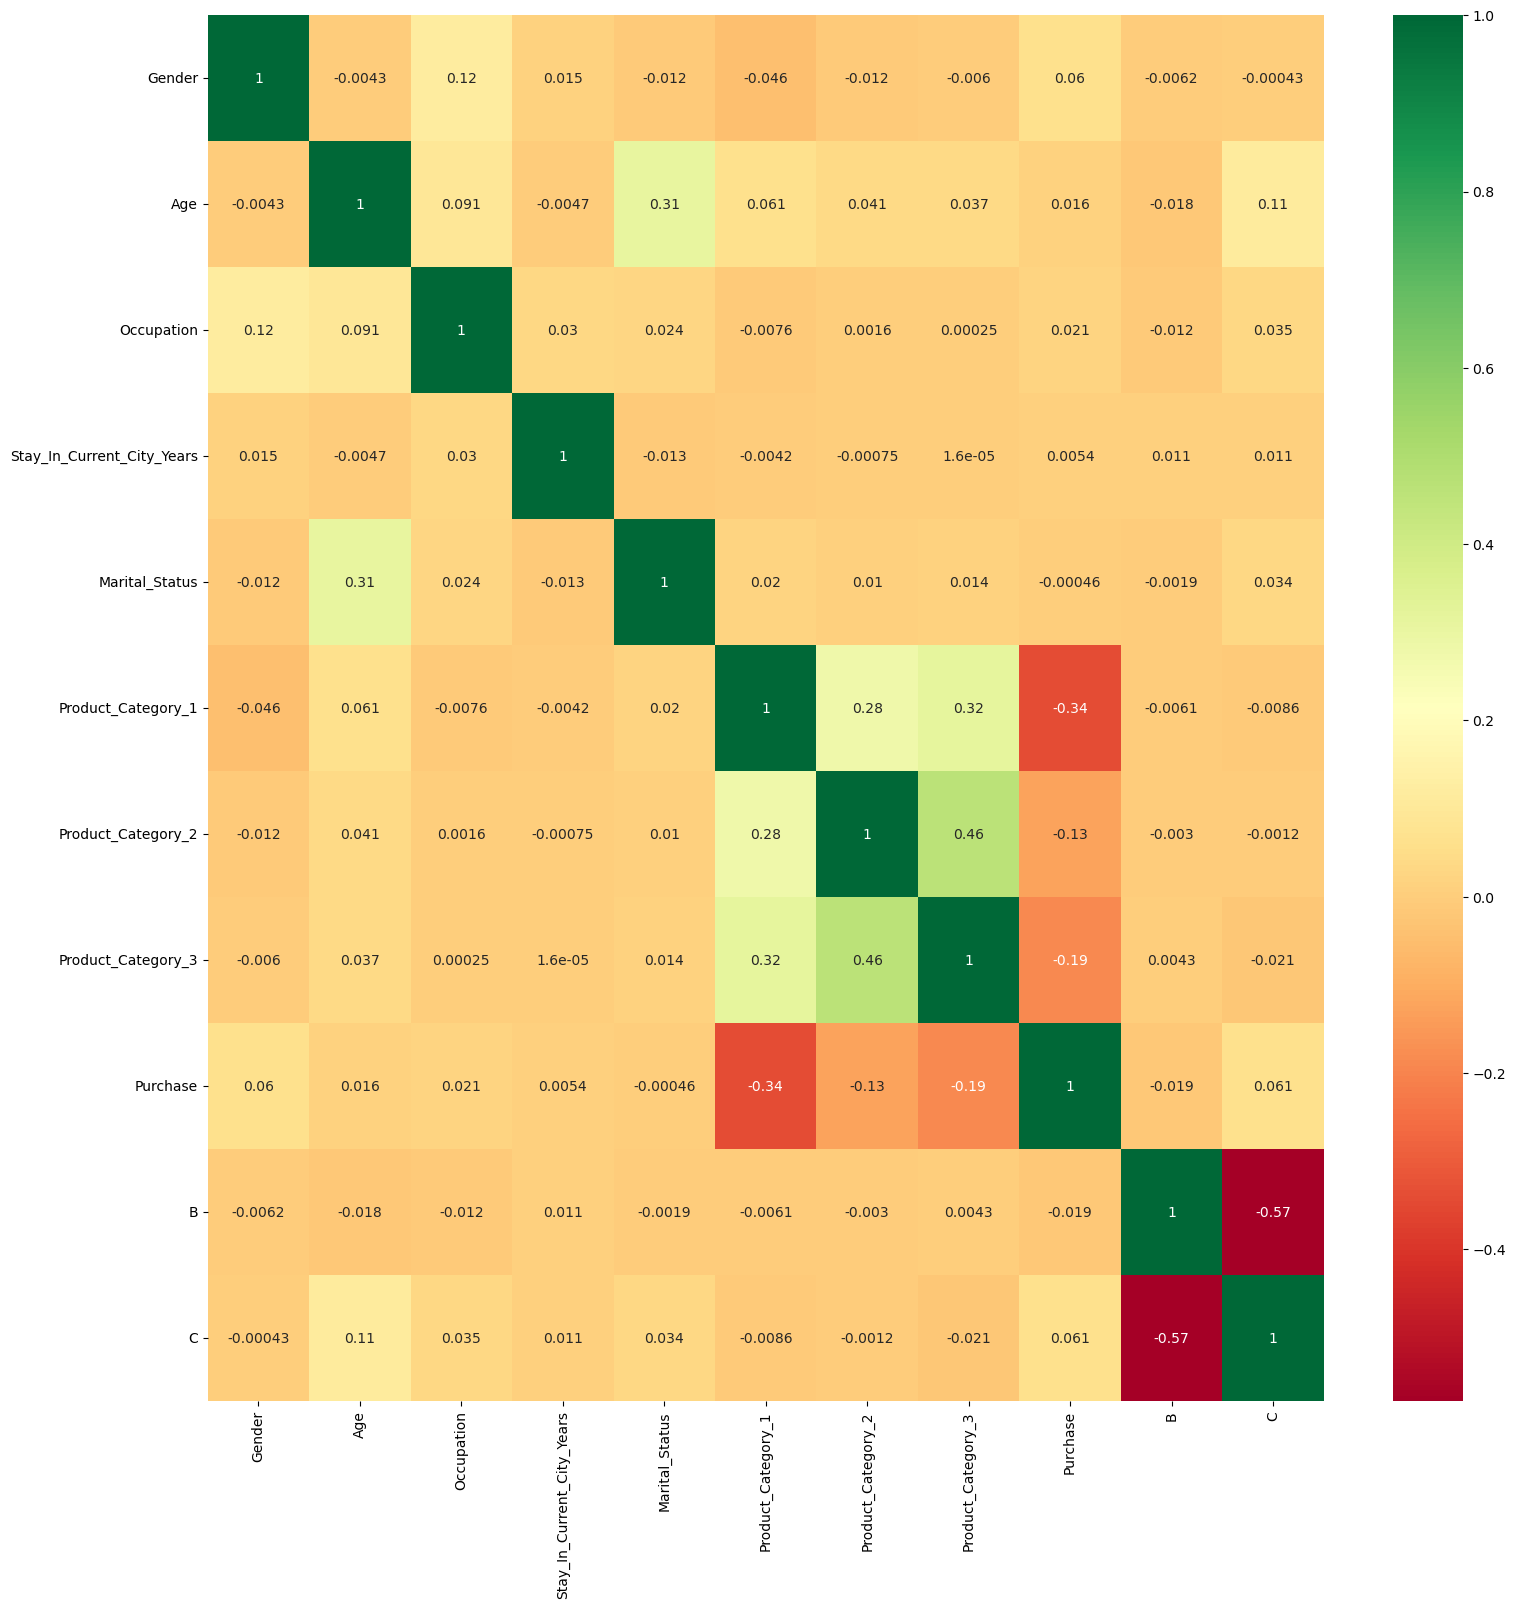

In [46]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Preparing data for models

## Train Test Split

In [47]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8,16,8370,0,0
1,0,1,10,2,0,1,6,14,15200,0,0
2,0,1,10,2,0,12,8,16,1422,0,0
3,0,1,10,2,0,12,14,16,1057,0,0
4,1,7,16,4,0,8,8,16,7969,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   Stay_In_Current_City_Years  550068 non-null  int64
 4   Marital_Status              550068 non-null  int64
 5   Product_Category_1          550068 non-null  int64
 6   Product_Category_2          550068 non-null  int64
 7   Product_Category_3          550068 non-null  int64
 8   Purchase                    550068 non-null  int64
 9   B                           550068 non-null  int64
 10  C                           550068 non-null  int64
dtypes: int64(11)
memory usage: 46.2 MB


In [49]:
X=df.drop('Purchase',axis=1)

In [50]:
y=df['Purchase']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,2,14,3,0,1,2,16,1,0
433826,1,6,0,0,1,8,16,16,0,0
516298,1,4,17,0,0,3,4,12,0,1
193380,1,3,4,1,0,8,16,16,1,0
273542,0,4,20,3,1,3,4,12,1,0


### Random Forest  Regression

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [54]:
#Ensembling Techniques Random Forest
rf=RandomForestRegressor(n_estimators=150)

In [55]:
rf.fit(X_train, y_train)
r_predict= rf.predict(X_test)

In [56]:
r_predict

array([14127.854     , 14743.98416774,  6402.53216691, ...,
       11436.28194849, 13086.55158693, 16225.34733951])

In [57]:
print("RMSE score for Random_Forest Regressor : ", np.sqrt(mean_squared_error(y_test,r_predict)))

RMSE score for Random_Forest Regressor :  3055.4846200841293


In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, r_predict)

0.6295623998813362

### XGBoost Regression

In [59]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
from xgboost import XGBRegressor

In [61]:
#XgBoost
xg=XGBRegressor()

In [62]:
xg.fit(X_train, y_train)
xg_predict= xg.predict(X_test)

In [63]:
xg_predict

array([16045.045 , 13470.468 ,  6867.8867, ..., 11348.873 , 13427.555 ,
       13654.529 ], dtype=float32)

In [64]:
print("RMSE score for XgBoosting Regressor: ", np.sqrt(mean_squared_error(y_test,xg_predict)))

RMSE score for XgBoosting Regressor:  2897.144791555415


In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, xg_predict)

0.666960873223869

## Test Dataset

In [66]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [68]:
df_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


### Handling the Missing values

In [69]:
## Checking the Missing values for test dataset
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [70]:
## Dropping the User_id for test Dataset
df_test.drop(['User_ID'], axis=1, inplace=True)
df_test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [71]:
## Dropping the Product_ID for test Dataset
df_test.drop(['Product_ID'], axis=1, inplace=True)
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,NaN
1,M,26-35,17,C,0,0,3,5.0,NaN
2,F,36-45,1,B,4+,1,5,14.0,NaN
3,F,36-45,1,B,4+,1,4,9.0,NaN
4,F,26-35,1,C,1,0,4,5.0,12.0


In [72]:
## Focus on replacing Missing values
df_test['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [73]:
df_test['Product_Category_2'].value_counts()

8.0     27229
14.0    23726
2.0     21281
16.0    18432
15.0    16259
4.0     11028
5.0     10930
6.0      7109
11.0     6096
17.0     5784
13.0     4523
9.0      2484
12.0     2273
10.0     1377
18.0     1257
3.0      1239
7.0       228
Name: Product_Category_2, dtype: int64

In [74]:
df_test['Product_Category_2'].mode()[0]

8.0

In [75]:
## Replace the missing values with mode
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mode()[0])

In [76]:
df_test['Product_Category_2'].isnull().sum()

0

In [77]:
## Product Category 3 replace Missing values
df_test['Product_Category_3'].unique()

array([nan, 12., 15.,  9., 16., 14.,  4.,  3.,  5.,  8., 17., 13., 11.,
       10.,  6., 18.])

In [78]:
df_test['Product_Category_3'].value_counts()

16.0    13833
15.0    11955
14.0     7855
5.0      7141
17.0     7116
8.0      5299
9.0      4953
12.0     3869
13.0     2390
6.0      1998
18.0     1992
4.0       816
11.0      780
10.0      775
3.0       265
Name: Product_Category_3, dtype: int64

In [79]:
df_test['Product_Category_3'].mode()[0]

16.0

In [80]:
## Replace the missing values with mode
df_test['Product_Category_3']=df_test['Product_Category_3'].fillna(df_test['Product_Category_3'].mode()[0])

In [81]:
df_test['Product_Category_3'].isnull().sum()

0

In [82]:
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,16.0
1,M,26-35,17,C,0,0,3,5.0,16.0
2,F,36-45,1,B,4+,1,5,14.0,16.0
3,F,36-45,1,B,4+,1,4,9.0,16.0
4,F,26-35,1,C,1,0,4,5.0,12.0


### Handling the categorical Feature for the test dataset

In [83]:
#Handling Categorical feature
df_test['Gender']=df_test['Gender'].map({'F':0,'M':1})
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,46-50,7,B,2,1,1,11.0,16.0
1,1,26-35,17,C,0,0,3,5.0,16.0
2,0,36-45,1,B,4+,1,5,14.0,16.0
3,0,36-45,1,B,4+,1,4,9.0,16.0
4,0,26-35,1,C,1,0,4,5.0,12.0


In [84]:
## Handle categorical feature Age
df_test['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [85]:
#pd.get_dummies(df['Age'],drop_first=True)
df_test['Age']=df_test['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [86]:
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,5,7,B,2,1,1,11.0,16.0
1,1,3,17,C,0,0,3,5.0,16.0
2,0,4,1,B,4+,1,5,14.0,16.0
3,0,4,1,B,4+,1,4,9.0,16.0
4,0,3,1,C,1,0,4,5.0,12.0


In [87]:
##fixing categorical City_category
df_test_city=pd.get_dummies(df_test['City_Category'],drop_first=True)

In [88]:
df_test_city.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [89]:
df_test=pd.concat([df_test,df_test_city],axis=1)
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,5,7,B,2,1,1,11.0,16.0,1,0
1,1,3,17,C,0,0,3,5.0,16.0,0,1
2,0,4,1,B,4+,1,5,14.0,16.0,1,0
3,0,4,1,B,4+,1,4,9.0,16.0,1,0
4,0,3,1,C,1,0,4,5.0,12.0,0,1


In [90]:
## Drop city category feature
df_test.drop('City_Category',axis=1,inplace=True)

In [91]:
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,5,7,2,1,1,11.0,16.0,1,0
1,1,3,17,0,0,3,5.0,16.0,0,1
2,0,4,1,4+,1,5,14.0,16.0,1,0
3,0,4,1,4+,1,4,9.0,16.0,1,0
4,0,3,1,1,0,4,5.0,12.0,0,1


In [92]:
#Stay_In_Current_City_Years
df_test['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [93]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].str.replace('+','')

In [94]:
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,5,7,2,1,1,11.0,16.0,1,0
1,1,3,17,0,0,3,5.0,16.0,0,1
2,0,4,1,4,1,5,14.0,16.0,1,0
3,0,4,1,4,1,4,9.0,16.0,1,0
4,0,3,1,1,0,4,5.0,12.0,0,1


In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  int64  
 1   Age                         233599 non-null  int64  
 2   Occupation                  233599 non-null  int64  
 3   Stay_In_Current_City_Years  233599 non-null  object 
 4   Marital_Status              233599 non-null  int64  
 5   Product_Category_1          233599 non-null  int64  
 6   Product_Category_2          233599 non-null  float64
 7   Product_Category_3          233599 non-null  float64
 8   B                           233599 non-null  uint8  
 9   C                           233599 non-null  uint8  
dtypes: float64(2), int64(5), object(1), uint8(2)
memory usage: 14.7+ MB


### Converting the Object Into Integer Type

In [96]:
##convert object into integers
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  int64  
 1   Age                         233599 non-null  int64  
 2   Occupation                  233599 non-null  int64  
 3   Stay_In_Current_City_Years  233599 non-null  int64  
 4   Marital_Status              233599 non-null  int64  
 5   Product_Category_1          233599 non-null  int64  
 6   Product_Category_2          233599 non-null  float64
 7   Product_Category_3          233599 non-null  float64
 8   B                           233599 non-null  uint8  
 9   C                           233599 non-null  uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 14.7 MB


In [97]:
df_test['B']=df_test['B'].astype(int)
df_test['C']=df_test['C'].astype(int)

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  int64  
 1   Age                         233599 non-null  int64  
 2   Occupation                  233599 non-null  int64  
 3   Stay_In_Current_City_Years  233599 non-null  int64  
 4   Marital_Status              233599 non-null  int64  
 5   Product_Category_1          233599 non-null  int64  
 6   Product_Category_2          233599 non-null  float64
 7   Product_Category_3          233599 non-null  float64
 8   B                           233599 non-null  int64  
 9   C                           233599 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 17.8 MB


In [99]:
df_test['Product_Category_2']=df_test['Product_Category_2'].astype(int)
df_test['Product_Category_3']=df_test['Product_Category_3'].astype(int)

In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      233599 non-null  int64
 1   Age                         233599 non-null  int64
 2   Occupation                  233599 non-null  int64
 3   Stay_In_Current_City_Years  233599 non-null  int64
 4   Marital_Status              233599 non-null  int64
 5   Product_Category_1          233599 non-null  int64
 6   Product_Category_2          233599 non-null  int64
 7   Product_Category_3          233599 non-null  int64
 8   B                           233599 non-null  int64
 9   C                           233599 non-null  int64
dtypes: int64(10)
memory usage: 17.8 MB


In [101]:
test_predict_rf = rf.predict(df_test)

In [102]:
test_predict_rf

array([16227.40313176, 10575.08420635,  8215.1231404 , ...,
       14354.23333333, 21715.15311111,  2441.53136195])

In [103]:
test_predict_xg = xg.predict(df_test)

In [104]:
test_predict_xg

array([14443.642 , 10849.002 ,  6548.9746, ..., 12551.775 , 19880.19  ,
        2497.976 ], dtype=float32)

## Submission of the Model Prediction

In [105]:
submission_random_forest = pd.DataFrame()
submission_random_forest['Purchase'] = r_predict

In [106]:
submission_random_forest.to_csv('submission_random_forest', index=False)

In [107]:
submission_xg_boost = pd.DataFrame()
submission_xg_boost['Purchase'] = xg_predict

In [108]:
submission_xg_boost.to_csv('submission_xg_boost', index=False)

In [109]:
submission_random_forest_test = pd.DataFrame()
submission_random_forest_test['Purchase'] = test_predict_rf

In [110]:
submission_random_forest_test.to_csv('submission_random_forest_test', index=False)

In [111]:
submission_xg_boost_test = pd.DataFrame()
submission_xg_boost_test['Purchase'] = test_predict_xg

In [112]:
submission_xg_boost_test.to_csv('submission_xg_boost_test', index=False)